In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

data = pd.read_csv('E:/python/Dataset/diabetes.csv')
data.head()

In [8]:
data.shape

(768, 9)

In [10]:
data = data.rename({'Outcome': 'Diabetes'}, axis = 'columns')

In [13]:
# checking for Null values
data.isnull().values.any()

False

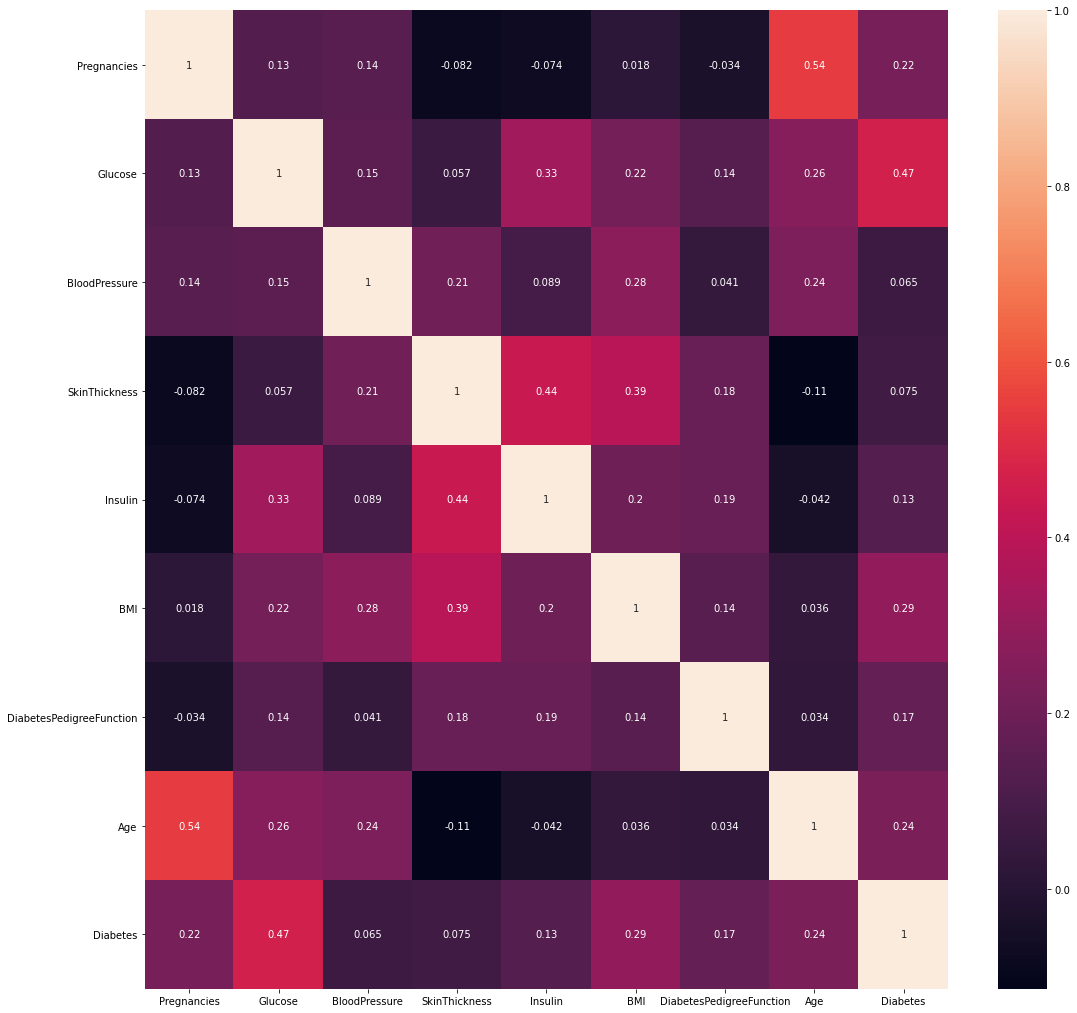

In [17]:
# Correlation between features and Label

import seaborn as sns 
import matplotlib.pyplot as plt 

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (18,18))
# plot Heatmap

g = sns.heatmap(data[top_corr_features].corr(),annot = True)

In [19]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [23]:
# Checking for Dataset if it's Balanced or not i.e If it has enough datapoints for both the outcomes 0 and 1

true_count = len(data.loc[data['Diabetes'] ==True])
false_count = len(data.loc[data['Diabetes'] ==False])

In [24]:
(true_count,false_count)

(268, 500)

In [27]:
# Train Test Split

from sklearn.model_selection import train_test_split

feature_columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
labels = ['Diabetes']

In [28]:
X = data[feature_columns].values
y = data[labels].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 10)

In [40]:
# DAtaset has many 0 values in many features which hinders our model prediction so we repalce it with imputer function

from sklearn.impute import SimpleImputer


fill_values = SimpleImputer(missing_values = 0, strategy = 'mean')

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [56]:
# Applying Random Forest Classifier as my Algorithm

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state = 30)
                
random_forest_model.fit(X_train,y_train.ravel())

RandomForestClassifier(random_state=30)

In [57]:
predict_train_data = random_forest_model.predict(X_test)

In [58]:
# Importing Metrices for Accuracy scores

from sklearn import metrics
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test,predict_train_data)))

Accuracy = 0.766
